In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('AirQuality.csv')
data.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### Checking for null values

In [4]:
data.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

No null values found

Text(0, 0.5, 'FREQUENCY')

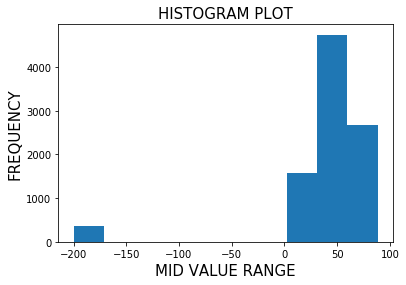

In [5]:
import matplotlib.pyplot as plt

plt.hist(data['RH'])
plt.title('HISTOGRAM PLOT' , fontsize = 15)
plt.xlabel('MID VALUE RANGE' , fontsize = 15)
plt.ylabel('FREQUENCY' , fontsize = 15)

### Dropping unwanted columns

In [6]:
data = data.drop(columns=['Date','Time'])
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### Splitting the data

In [7]:
y = data['RH']
x = data.drop('RH' , axis = 1)

In [8]:
x

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,0.7568
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,0.7119
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,0.6406
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,0.5139


In [9]:
y

0       48.9
1       47.7
2       54.0
3       60.0
4       59.6
        ... 
9352    29.3
9353    23.7
9354    18.3
9355    13.5
9356    13.1
Name: RH, Length: 9357, dtype: float64

In [10]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# temp = scaler.fit_transform(x)

# x = pd.DataFrame(temp , columns = x.columns)
# x.head()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3)

print('Shape(X_train) : ' , x_train.shape)
print('Shape(y_train) : ' , y_train.shape)
print('Shape(X_test) : ' , x_test .shape)
print('Shape(y_test) : ' , y_test.shape)

Shape(X_train) :  (6549, 12)
Shape(y_train) :  (6549,)
Shape(X_test) :  (2808, 12)
Shape(y_test) :  (2808,)


## Different Models

In [12]:
model_1 = LinearRegression()

model_2 = RandomForestRegressor()

model_3 = SVR()

## Predictions

In [13]:
model_1.fit(x_train , y_train)
y_pred_1 = model_1.predict(x_test)

model_2.fit(x_train , y_train)
y_pred_2 = model_2.predict(x_test)

model_3.fit(x_train , y_train)
y_pred_3 = model_3.predict(x_test)

In [14]:
print('Prediction from Linear Regression \n\n')
print(y_pred_1 , end = '\n\n')

print('Prediction from Random forest regressor \n\n')
print(y_pred_2 , end = '\n\n')

print('Prediction from SVM regressor \n\n')
print(y_pred_3 , end = '\n\n')

Prediction from Linear Regression 


[54.7108233  64.30981505 43.43027261 ... 40.55830121 39.53076272
 60.62321512]

Prediction from Random forest regressor 


[48.219 58.428 36.057 ... 43.598 42.702 61.39 ]

Prediction from SVM regressor 


[52.64472857 50.79376644 53.19158035 ... 47.98808979 51.54319469
 52.09877146]



## RMS Error

In [15]:
from math import sqrt

In [16]:
rms_model_1 = sqrt(mean_squared_error(y_test , y_pred_1))

rms_model_2 = sqrt(mean_squared_error(y_test , y_pred_2))

rms_model_3 = sqrt(mean_squared_error(y_test , y_pred_3))

In [17]:
print('RMSE for Linear Regression : ' , rms_model_1)
print('RMSE for Random forest regressor : ' , rms_model_2)
print('RMSE for SVM regressor : ' , rms_model_3)

RMSE for Linear Regression :  7.597276045685295
RMSE for Random forest regressor :  0.6365150259067951
RMSE for SVM regressor :  14.047484574674794


## Accuracy

In [18]:
print('Accuracy of Linear Regression : ' , model_1.score(x_test, y_test))
print('Accuracy of Random forest regressor : ' , model_2.score(x_test, y_test))
print('Accuracy of SVM regressor : ' , model_3.score(x_test, y_test))

Accuracy of Linear Regression :  0.9767089626736404
Accuracy of Random forest regressor :  0.9998365103219631
Accuracy of SVM regressor :  0.9203712046314372
